In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Lendo o sinal de audio
audio, samplerate = sf.read('botao.wav')
# criar um sinal mono
sinal = audio[:, 0] + audio[:, 1]

In [ ]:
# Configuração para melhorar visualização do grafico
plt.rcParams['figure.dpi'] = 100

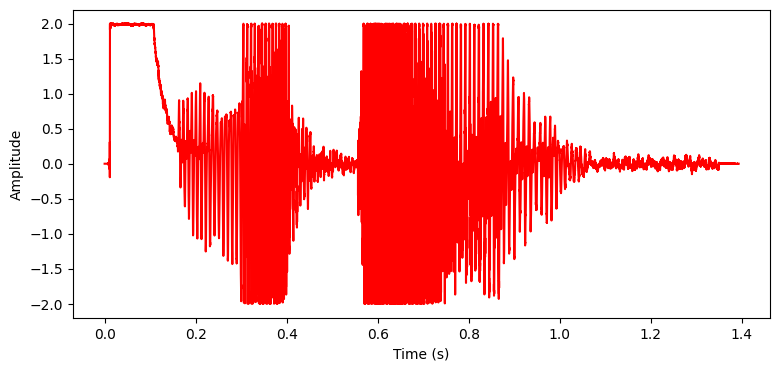

In [ ]:
# Criando um array de tempo com base no comprimento do sinal e na taxa de amostragem
time = np.arange(0, len(sinal) * 1/samplerate, 1/samplerate)

# Plotando o sinal em função do tempo
plt.figure(figsize=(9, 4))
plt.plot(time, sinal, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

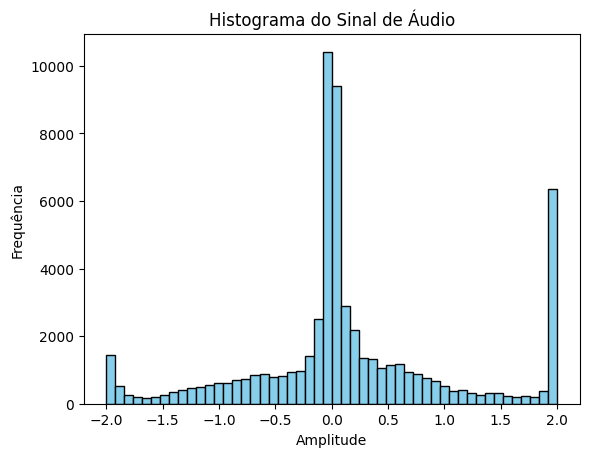

In [ ]:
# Criando um histograma do sinal com 50 bins
plt.hist(sinal, bins=50, color='skyblue', edgecolor='black')

plt.title('Histograma do Sinal de Áudio')
plt.xlabel('Amplitude')
plt.ylabel('Frequência')
plt.show()

In [ ]:
from scipy.stats import kurtosis, skew

In [ ]:
# Calcular a assimetria e a curtose
assimetria = skew(sinal, bias=False)
curtose = kurtosis(sinal, fisher=False, bias=False)

# Imprimir os resultados
print(f"Assimetria: {assimetria:.5f}")
print(f"Curtose: {curtose:.5f}")

Assimetria: 0.25038
Curtose: 3.37169


**Resposta:** A análise do sinal no domínio do tempo revela uma assimetria, indicando que a distribuição das amplitudes do sinal é um pouco inclinada para um lado. Quanto ao valor da curtose, a observação do histograma do sinal confirma que é algo esperado, mostrando que o sinal tem um pico agudo, o que é característico de uma distribuição leptocúrtica. Portanto, um valor de curtose maior que 3 é esperado.

In [ ]:
# Dividindo o sinal em 10 partes iguais e calculando a media para cada parte
sinal_partes = np.array_split(sinal, 10)
medias = np.zeros(10)
for i in range(10):
    medias[i] = np.mean(sinal_partes[i])
print('Média temporal:')
print([round(media, 5) for media in medias])

Média temporal:
[1.63217, 0.14213, -0.05879, -0.00351, 0.0021, -0.08317, -0.011, 0.00085, 0.00091, -0.00323]


**Resposta:** A média do sinal de áudio não é constante e varia com o tempo. Isso indica que o valor médio do sinal muda ao longo do tempo, refletindo variações na amplitude do sinal.

In [ ]:
from scipy.signal import correlate

# Calculando a autocorrelação de cada parte do sinal
autoCorrelacao = []
for i in range(10):
    autoCorrelacao.append(correlate(sinal_partes[i], sinal_partes[i][20:]))

print(autoCorrelacao[0]) # primeira parte

[ 0.00000000e+00 -1.94134203e-05 -5.81638888e-05 ... -1.21265960e-12
  1.21265960e-12  1.21265960e-12]


In [ ]:
len(autoCorrelacao[0])

12267

**Resposta:** Cada parte do sinal possui um padrão único de autocorrelação, o que indica variações na periodicidade e na estrutura do sinal ao longo do tempo.

**6 - Com base nas questões 4 e 5, você considera que o sinal é estacionário no
sentido amplo? Coloque a resposta em forma de comentário logo abaixo desta
questão.**

**Resposta:** Dado as análises ateriores o sinal não parece ser estacionário no sentido amplo, pois tanto a média temporal quanto a autocorrelação variam ao longo do tempo.
